In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [26]:
digits = pd.read_csv('D:\\Data_Science\\Assignments\\SVM_Assignment\\train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
digits.shape

(42000, 785)

#### Using 20% of the data for analysis

In [28]:
## Using train-test split to randomly extract 20% of the data

np.random.seed(0)
digits_train, digits_rest = train_test_split(digits, train_size = 0.2, test_size = 0.8, random_state = 100)

In [29]:
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32202,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40863,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18288,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33556,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


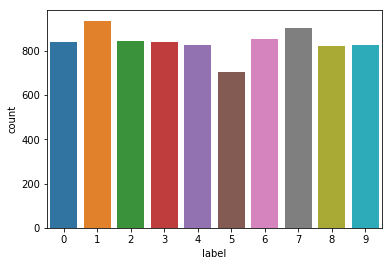

In [30]:
sns.countplot(x = 'label',
              data = digits_train)

In [31]:
digits_train.shape

(8400, 785)

In [32]:
digits_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,...,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0
mean,4.455833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194405,0.068571,0.041429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.931059,3.029374,2.542778,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,231.000000,172.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
digits_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 32202 to 38408
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.7 MB


In [34]:
digits_train.loc[:, digits_train.isnull().mean() > 0]

""
32202
40863
18288
1489
33556
21041
18287
14023
4564
14101


### No Null Values

In [35]:
# Checking for duplicates
df = digits_train.iloc[:,1:]
df["is_duplicate"]= df.duplicated()
df = df[df['is_duplicate'] == True]
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,is_duplicate


### No Duplicates

In [36]:
# splitting into X and y
X = digits_train.drop("label", axis = 1)
y = digits_train.label

In [37]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

In [38]:
# confirm that splitting also has similar distribution
print(y_train.mean())
print(y_test.mean())

4.430612244897959
4.51468253968254


## Model Building

### Trying different kernel, with constant value of C and gamma

In [39]:
# using rbf kernel, C=0.01, gamma = 1
from sklearn.svm import SVC

model = SVC(C = 0.01, gamma = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[  0, 239,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 269,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 269,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 234,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 254,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 204,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 277,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 263,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 270,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 241,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [41]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.10674603174603174


#### Let's try with some other kernel

In [42]:
model = SVC(C = 0.01, gamma = 1, kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

[[233   0   1   2   0   3   0   0   0   0]
 [  0 265   1   0   1   0   1   1   0   0]
 [  4   2 240   3   8   3   4   3   2   0]
 [  0   0  11 202   1  14   0   3   3   0]
 [  2   0   3   0 240   0   2   0   0   7]
 [  1   2   1   7   2 179   4   0   6   2]
 [  1   0   3   1   3   1 266   1   1   0]
 [  2   2   3   1   2   0   0 248   0   5]
 [  2   7   2   5   3   6   3   1 237   4]
 [  1   1   0   5   7   2   0   9   1 215]]
accuracy 0.9226190476190477


In [43]:
model = SVC(C = 0.01, gamma = 1, kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

[[234   0   1   0   0   2   0   0   2   0]
 [  0 265   0   0   1   0   1   1   1   0]
 [  2   0 252   1   3   0   1   3   7   0]
 [  0   0   3 218   0   4   0   2   6   1]
 [  0   0   0   0 248   0   1   0   1   4]
 [  0   1   1   6   2 190   0   0   4   0]
 [  1   0   1   0   3   0 269   1   2   0]
 [  1   1   3   0   3   0   0 249   1   5]
 [  0   2   1   1   2   3   1   0 259   1]
 [  0   0   2   3   5   1   0  10   2 218]]
accuracy 0.9531746031746032


#### From the accuracy values, it is clear that a linear or Poly kernel SVM will be best suited for the data.
### Using K-fold cross validation and GridSearch to find the optimal values of parameters

In [44]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'C': [0.001, 0.01, 0.1, 1],
                     'gamma': [0.1, 1, 10],
                 'kernel': ['linear','poly']}]


# specify model
model = SVC()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

print('Performing GridSearch, please wait....')
print('         ......................')
# fit the model
model_cv.fit(X_train, y_train)                  


Performing GridSearch, please wait....
         ......................
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 49.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [45]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.069202,0.121798,2.625619,0.008047,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.917517,0.920918,...,0.914116,0.008605,16,0.945578,0.946854,0.949405,0.945366,0.944090,0.946259,0.001801
1,18.224026,0.204212,2.906303,0.011559,0.001,0.1,poly,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}",0.948980,0.945578,...,0.943027,0.004900,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,8.055227,0.189721,2.657864,0.036498,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.917517,0.920918,...,0.914116,0.008605,16,0.945578,0.946854,0.949405,0.945366,0.944090,0.946259,0.001801
3,18.396511,0.308616,2.969978,0.106905,0.001,1,poly,"{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}",0.948980,0.945578,...,0.943027,0.004900,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,8.102839,0.254020,2.683614,0.042555,0.001,10,linear,"{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}",0.917517,0.920918,...,0.914116,0.008605,16,0.945578,0.946854,0.949405,0.945366,0.944090,0.946259,0.001801
5,18.193485,0.134768,2.906602,0.016601,0.001,10,poly,"{'C': 0.001, 'gamma': 10, 'kernel': 'poly'}",0.948980,0.945578,...,0.943027,0.004900,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,5.071972,0.046352,1.953773,0.020979,0.01,0.1,linear,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.915816,0.931973,...,0.919388,0.009038,13,0.987245,0.986607,0.987457,0.986395,0.985969,0.986735,0.000548
7,18.179309,0.130259,2.908194,0.026030,0.01,0.1,poly,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}",0.948980,0.945578,...,0.943027,0.004900,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,5.089439,0.051640,1.966147,0.024223,0.01,1,linear,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.915816,0.931973,...,0.919388,0.009038,13,0.987245,0.986607,0.987457,0.986395,0.985969,0.986735,0.000548
9,18.171226,0.263988,2.931855,0.058796,0.01,1,poly,"{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}",0.948980,0.945578,...,0.943027,0.004900,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [46]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9430272108843537 corresponding to hyperparameters {'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}


#### Using the above information, to build the model

In [47]:
model = SVC(C = 0.001, gamma = 0.1, kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

[[234   0   1   0   0   2   0   0   2   0]
 [  0 265   0   0   1   0   1   1   1   0]
 [  2   0 252   1   3   0   1   3   7   0]
 [  0   0   3 218   0   4   0   2   6   1]
 [  0   0   0   0 248   0   1   0   1   4]
 [  0   1   1   6   2 190   0   0   4   0]
 [  1   0   1   0   3   0 269   1   2   0]
 [  1   1   3   0   3   0   0 249   1   5]
 [  0   2   1   1   2   3   1   0 259   1]
 [  0   0   2   3   5   1   0  10   2 218]]
accuracy 0.9531746031746032


## Predicting the label of test data using the hyperparameters chosen

In [60]:
digits_test = pd.read_csv('D:\\Data_Science\\Assignments\\SVM_Assignment\\test.csv')

In [61]:
print(digits_test.shape)
digits_test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test_result = pd.DataFrame()
test_result['Id'] = pd.Series(digits_test.index)

In [59]:
model = SVC(C = 0.001, gamma = 0.1, kernel='poly')
model.fit(X_train, y_train)

test_result['label'] = model.predict(digits_test)

In [63]:
test_result.head(20)

,Id,label
0,0,2
1,1,0
2,2,8
3,3,9
4,4,3
5,5,7
6,6,0
7,7,3
8,8,0
9,9,3
